# Inferential Statistics Project: Problem Statement

Problem **1**

A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.**bold text**

In [1]:
import pandas as pd


Create the DataFrame from the given **table**

In [2]:
# Define the data
data = {
    'Position': ['Striker', 'Forward', 'Attacking Midfielder', 'Winger'],
    'Injured': [45, 56, 24, 20],
    'Not Injured': [32, 38, 11, 9]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate totals
df['Total'] = df['Injured'] + df['Not Injured']
df.loc['Total'] = df[['Injured', 'Not Injured', 'Total']].sum()
df.loc['Total', 'Position'] = 'Total'

# Display the table
print(df)


                   Position  Injured  Not Injured  Total
0                   Striker     45.0         32.0   77.0
1                   Forward     56.0         38.0   94.0
2      Attacking Midfielder     24.0         11.0   35.0
3                    Winger     20.0          9.0   29.0
Total                 Total    145.0         90.0  235.0


Q1.1: Probability that a randomly chosen player is **injured ?**

In [3]:
total_players = df.loc['Total', 'Total']
injured_players = df.loc['Total', 'Injured']

prob_injured = injured_players / total_players
print(f"1.1 Probability of injury: {prob_injured:.3f} or {prob_injured*100:.1f}%")


1.1 Probability of injury: 0.617 or 61.7%


1.2 What is the probability that a player is a forward or a winger?**bold text**

In [4]:
forward = df[df['Position'] == 'Forward']['Total'].values[0]
winger = df[df['Position'] == 'Winger']['Total'].values[0]

prob_forward_winger = (forward + winger) / total_players
print(f"1.2 Probability of Forward or Winger: {prob_forward_winger:.3f} or {prob_forward_winger*100:.1f}%")


1.2 Probability of Forward or Winger: 0.523 or 52.3%


1.3 What is the probability that a randomly chosen player plays in a striker position and **has** a foot injury?

In [5]:
injured_striker = df[df['Position'] == 'Striker']['Injured'].values[0]

prob_striker_injured = injured_striker / total_players
print(f"1.3 Probability of Striker and Injured: {prob_striker_injured:.3f} or {prob_striker_injured*100:.1f}%")


1.3 Probability of Striker and Injured: 0.191 or 19.1%


1.4 What is the probability that a randomly chosen injured player is a striker?

In [6]:
prob_striker_given_injured = injured_striker / injured_players
print(f"1.4 P(Striker | Injured): {prob_striker_given_injured:.3f} or {prob_striker_given_injured*100:.1f}%")


1.4 P(Striker | Injured): 0.310 or 31.0%


# Problem 2

The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information;

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


Define the parameters for the normal distribution

In [8]:
# Given mean and standard deviation
mean = 5      # in kg/sq cm
std_dev = 1.5


2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

In [40]:
p1 = norm.cdf(3.17, loc=mean, scale=std_dev)
print(f"2.1: P(X < 3.17) = {p1:.3f}")
plt.show()

2.1: P(X < 3.17) = 0.111


2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

In [41]:
p2 = 1 - norm.cdf(3.6, loc=mean, scale=std_dev)
print(f"2.2: P(X ≥ 3.6) = {p2:.3f}")
plt.show()

2.2: P(X ≥ 3.6) = 0.825


2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [42]:
p3 = norm.cdf(5.5, loc=mean, scale=std_dev) - norm.cdf(5, loc=mean, scale=std_dev)
print(f"2.3: P(5 ≤ X ≤ 5.5) = {p3:.3f}")


2.3: P(5 ≤ X ≤ 5.5) = 0.131


2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [16]:
p4 = norm.cdf(3, loc=mean, scale=std_dev) + (1 - norm.cdf(7.5, loc=mean, scale=std_dev))
print(f"2.4: P(X < 3 or X > 7.5) = {p4:.3f}")

2.4: P(X < 3 or X > 7.5) = 0.139


# Visualize the results using plots

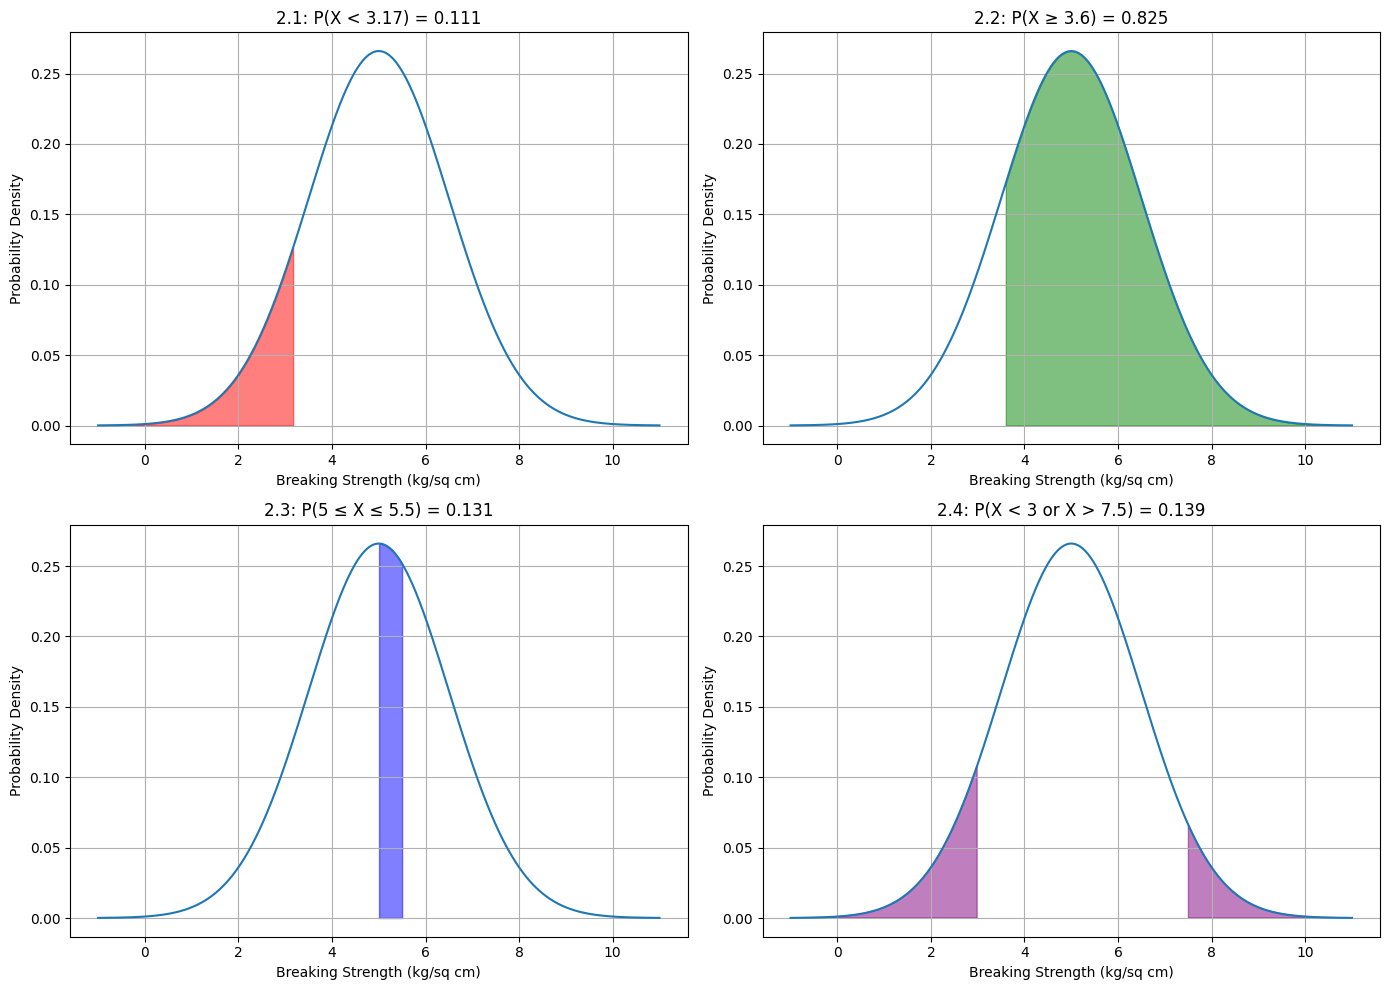

In [17]:
# Plotting the normal distribution and highlighting the required areas
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# 2.1
axs[0].plot(x, y)
axs[0].fill_between(x, y, where=(x < 3.17), color='red', alpha=0.5)
axs[0].set_title(f"2.1: P(X < 3.17) = {p1:.3f}")

# 2.2
axs[1].plot(x, y)
axs[1].fill_between(x, y, where=(x >= 3.6), color='green', alpha=0.5)
axs[1].set_title(f"2.2: P(X ≥ 3.6) = {p2:.3f}")

# 2.3
axs[2].plot(x, y)
axs[2].fill_between(x, y, where=(x >= 5) & (x <= 5.5), color='blue', alpha=0.5)
axs[2].set_title(f"2.3: P(5 ≤ X ≤ 5.5) = {p3:.3f}")

# 2.4
axs[3].plot(x, y)
axs[3].fill_between(x, y, where=(x < 3) | (x > 7.5), color='purple', alpha=0.5)
axs[3].set_title(f"2.4: P(X < 3 or X > 7.5) = {p4:.3f}")

for ax in axs:
    ax.set_xlabel("Breaking Strength (kg/sq cm)")
    ax.set_ylabel("Probability Density")
    ax.grid(True)

plt.tight_layout()
plt.show()


# Problem 3

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

In [18]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv('Zingaro_Company.csv')

In [21]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [22]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [25]:
# H0: mu >= 150, H1: mu < 150
unpolished = df['Unpolished ']
t_stat, p_value = stats.ttest_1samp(unpolished, 150)

# One-tailed p-value
p_value_one_tailed = p_value / 2

# Check if mean is actually less than 150
mean_unpolished = np.mean(unpolished)
result_3_1 = "Reject H0" if (p_value_one_tailed < 0.05 and mean_unpolished < 150) else "Fail to Reject H0"

In [30]:
print("Q3.1: One-Sample T-Test (Unpolished < 150)")
print(f"Mean of unpolished: {mean_unpolished:.2f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"One-tailed p-value: {p_value_one_tailed:.3f}")
print(f"Result: {result_3_1}\n")

Q3.1: One-Sample T-Test (Unpolished < 150)
Mean of unpolished: 134.11
t-statistic: -4.165
One-tailed p-value: 0.000
Result: Reject H0



3.2 Is the mean hardness of the polished and unpolished stones the same?

In [28]:
# H0: mu1 = mu2, H1: mu1 ≠ mu2
unpolished = df['Unpolished ']
Polished = df['Treated and Polished']
t_stat_2samp, p_value_2samp = stats.ttest_ind(unpolished, Polished, equal_var=False)
result_3_2 = "Reject H0" if p_value_2samp < 0.05 else "Fail to Reject H0"

In [29]:
print(f"3.2 Hypothesis Test Result for Polished vs Unpolished Stones: {result_3_2}")
print(f"P-value: {p_value_2samp:.3f}")

3.2 Hypothesis Test Result for Polished vs Unpolished Stones: Reject H0
P-value: 0.002


In [31]:
print("Q3.2: Two-Sample T-Test (Unpolished vs Polished)")
print(f"t-statistic: {t_stat_2samp:.3f}")
print(f"Two-tailed p-value: {p_value_2samp:.3f}")
print(f"Result: {result_3_2}")

Q3.2: Two-Sample T-Test (Unpolished vs Polished)
t-statistic: -3.242
Two-tailed p-value: 0.002
Result: Reject H0


# Problem 4

Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [32]:
import pandas as pd
from scipy import stats

In [34]:
df = pd.read_excel("Dental Hardness data.xlsx")
print(df.head())

   Dentist  Method  Alloy  Temp  Response
0        1       1      1  1500       813
1        1       1      1  1600       792
2        1       1      1  1700       792
3        1       1      2  1500       907
4        1       1      2  1600       792


In [35]:
df.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


4.1 How does the hardness of implants vary depending on dentists?

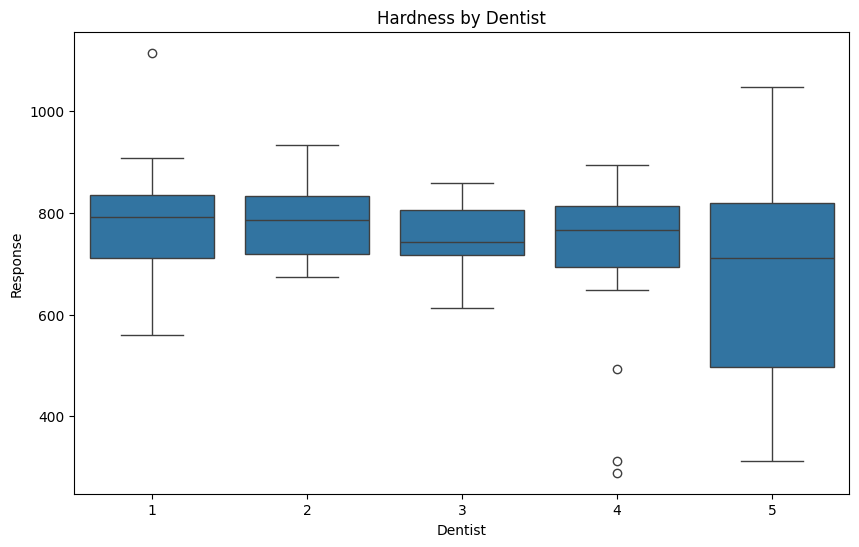

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dentist', y='Response', data=df)
plt.title("Hardness by Dentist")
plt.show()


4.2 How does the hardness of implants vary depending on methods?

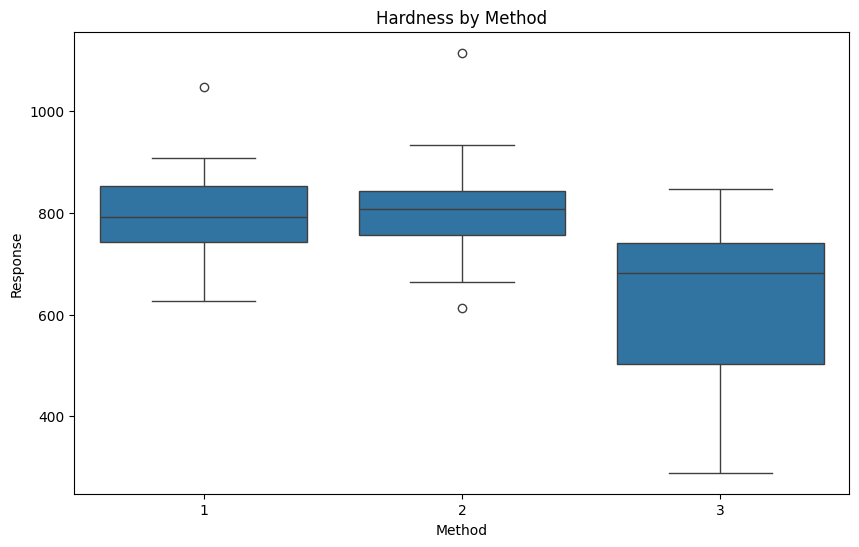

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Method', y='Response', data=df)
plt.title("Hardness by Method")
plt.show()


4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

<Figure size 1200x600 with 0 Axes>

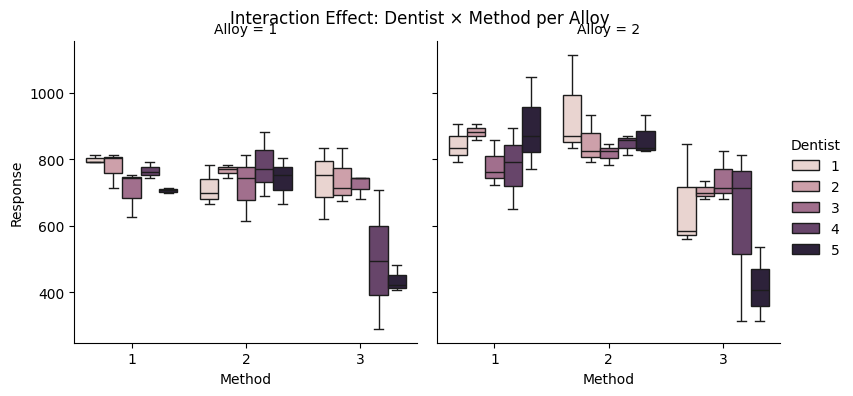

In [38]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Method', y='Response', hue='Dentist', col='Alloy',
            data=df, kind='box', height=4, aspect=1)
plt.subplots_adjust(top=0.9)
plt.suptitle("Interaction Effect: Dentist × Method per Alloy")
plt.show()


4.4 How does the hardness of implants vary depending on dentists and methods together?

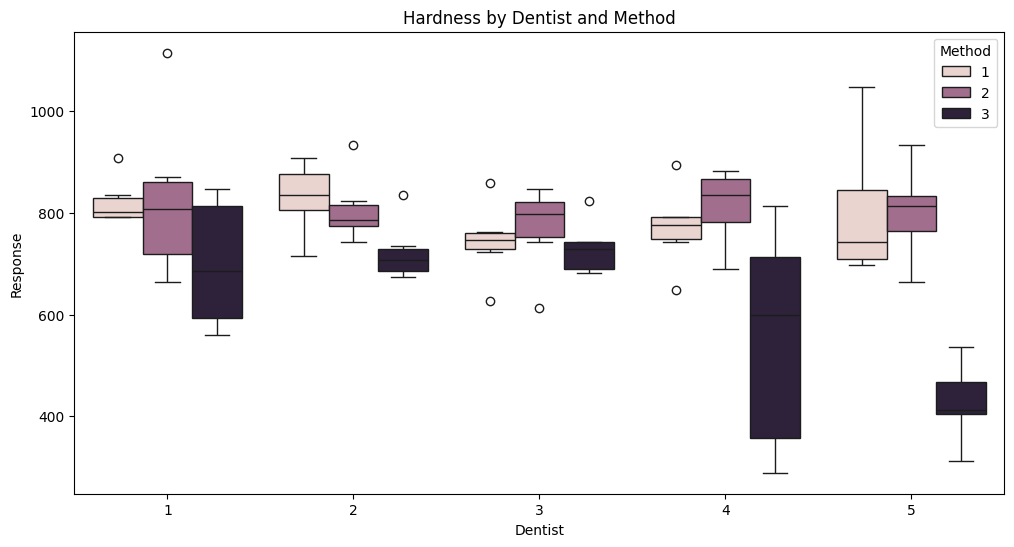

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dentist', y='Response', hue='Method', data=df)
plt.title("Hardness by Dentist and Method")
plt.show()
